In [ ]:
import pandas as pd
import pickle
import numpy as np
import h5py
from ast_models_original import ASTModel
%matplotlib inline
import subprocess
import pickle
import socket
import matplotlib.pyplot as plt

In [ ]:
curr_node = socket.gethostname().split('.')[0]
batcmd=f"squeue -u billyli | grep {curr_node}"
curr_slurm = subprocess.check_output(batcmd, shell=True, text=True)
slurm_id = curr_slurm.strip().split(' ')[0]
print(slurm_id)

# 64x400 Feature

In [90]:
temp_hash_ids = np.concatenate(pickle.load(open(f'/local/slurm-{slurm_id}/local/audio/file_seq_64_400.pkl','rb')))
print(temp_hash_ids)
hash_ids = []
for item in temp_hash_ids:
    hash_ids.append(item.split('/')[-1][:-4])
print(len(hash_ids))

['/local/slurm-7786243/local/audio/eval_wav/--4gqARaEJE.wav'
 '/local/slurm-7786243/local/audio/eval_wav/--BfvyPmVMo.wav'
 '/local/slurm-7786243/local/audio/eval_wav/--U7joUcTCo.wav' ...
 '/local/slurm-7786243/local/audio/eval_wav/zzD_oVgzKMc.wav'
 '/local/slurm-7786243/local/audio/eval_wav/zzNdwF40ID8.wav'
 '/local/slurm-7786243/local/audio/eval_wav/zzbTaK7CXJY.wav']
20123


In [96]:
print(hash_ids[6])

-0Gj8-vB1q4


In [91]:
hf_val_eval = h5py.File(f'/local/slurm-{slurm_id}/local/audio/data_64_400_again.h5', 'r')
feat_a = hf_val_eval['feat_a'][:]
labels = hf_val_eval['labels'][:]

# 128x1024 Feature

In [ ]:
temp_hash_ids = np.concatenate(pickle.load(open(f'/local/slurm-{slurm_id}/local/audio/file_seq_128_1024.pkl','rb')))
print(temp_hash_ids)
hash_ids = []
for item in temp_hash_ids:
    hash_ids.append(item.split('/')[-1][:-4])

In [ ]:
hf_val_eval = h5py.File(f'/local/slurm-{slurm_id}/local/audio/data_128_1024_again.h5', 'r')
feat_a = hf_val_eval['feat_a'][:]
labels = hf_val_eval['labels'][:]

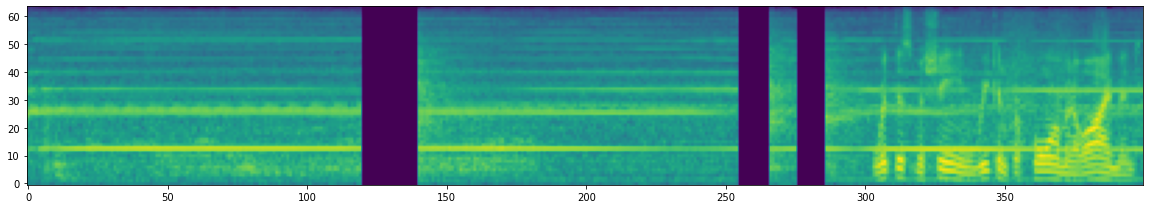

In [100]:
plt.figure(figsize = (20,10))
plt.imshow(feat_a[1].T, origin='lower')
plt.savefig('imgs/hammer_strong.png')

##### Label

In [25]:
for label in labels:
    print(np.nonzero(label))

(array([ 72,  73,  74, 361]),)
(array([419]),)
(array([47]),)
(array([  0,  33,  34, 137]),)
(array([17, 20, 21]),)
(array([  0,  53, 137]),)
(array([137, 268, 273]),)
(array([307, 379]),)
(array([137, 268]),)
(array([  0,  72,  87,  89, 137]),)
(array([364]),)
(array([  0, 433]),)
(array([ 62, 137]),)
(array([ 57, 137]),)
(array([  0, 299]),)
(array([111, 509, 520]),)
(array([ 72,  73, 288, 372, 451, 452, 454]),)
(array([  0,  61, 370, 371, 506]),)
(array([137, 525]),)
(array([  0,   2, 481]),)
(array([137, 525]),)
(array([469]),)
(array([137, 176]),)
(array([  0, 135, 137]),)
(array([ 0, 65]),)
(array([288, 374]),)
(array([343, 350, 352]),)
(array([ 0, 50]),)
(array([426]),)
(array([347]),)
(array([525]),)
(array([  0, 137, 139, 140, 143, 145, 146]),)
(array([300, 316, 319]),)
(array([  0,  94, 137]),)
(array([286, 287, 289, 291]),)
(array([ 0, 71]),)
(array([  0, 389, 506]),)
(array([137, 138, 183]),)
(array([343, 351]),)
(array([275]),)
(array([296, 403]),)
(array([283, 285, 301, 3

In [51]:
print(labels[0].nonzero()[0].tolist())

[72, 73, 74, 361]


In [8]:
strong_labels = pd.read_csv('./audioset_strong_label/audioset_eval_strong.tsv', sep='\t')

In [9]:
feat_a.shape, labels.shape

((20123, 400, 64), (20123, 527))

In [10]:
strong_labels 

,segment_id,start_time_seconds,end_time_seconds,label
0,s9d-2nhuJCQ_30000,0.000,10.000,/m/04rlf
1,s9d-2nhuJCQ_30000,2.627,7.237,/m/053hz1
2,s9d-2nhuJCQ_30000,2.627,9.239,/m/03qtwd
3,s9d-2nhuJCQ_30000,5.634,6.649,/m/01w250
4,s9d-2nhuJCQ_30000,7.201,8.560,/m/0l15bq
...,...,...,...,...
139533,skwl9axYSIE_400000,0.213,2.984,/m/05zppz
139534,skwl9axYSIE_400000,3.354,4.181,/m/05zppz
139535,skwl9axYSIE_400000,4.496,5.819,/m/05zppz
139536,skwl9axYSIE_400000,8.559,8.898,/m/07pggtn


In [33]:
class_label = pd.read_csv('./audioset_strong_label/class_labels_indices.csv', sep=',')

In [36]:
class_label[['mid','index','display_name']]

,mid,index,display_name
0,/m/09x0r,0,Speech
1,/m/05zppz,1,"Male speech, man speaking"
2,/m/02zsn,2,"Female speech, woman speaking"
3,/m/0ytgt,3,"Child speech, kid speaking"
4,/m/01h8n0,4,Conversation
...,...,...,...
522,/m/07p_0gm,522,Throbbing
523,/m/01jwx6,523,Vibration
524,/m/07c52,524,Television
525,/m/06bz3,525,Radio


In [81]:
# class_label.loc[523].at["display_name"]
class_label['mid'].values

array(['/m/09x0r', '/m/05zppz', '/m/02zsn', '/m/0ytgt', '/m/01h8n0',
       '/m/02qldy', '/m/0261r1', '/m/0brhx', '/m/07p6fty', '/m/07q4ntr',
       '/m/07rwj3x', '/m/07sr1lc', '/m/04gy_2', '/t/dd00135',
       '/m/03qc9zr', '/m/02rtxlg', '/m/01j3sz', '/t/dd00001',
       '/m/07r660_', '/m/07s04w4', '/m/07sq110', '/m/07rgt08',
       '/m/0463cq4', '/t/dd00002', '/m/07qz6j3', '/m/07qw_06',
       '/m/07plz5l', '/m/015lz1', '/m/0l14jd', '/m/01swy6', '/m/02bk07',
       '/m/01c194', '/t/dd00003', '/t/dd00004', '/t/dd00005',
       '/t/dd00006', '/m/06bxc', '/m/02fxyj', '/m/07s2xch', '/m/07r4k75',
       '/m/01w250', '/m/0lyf6', '/m/07mzm6', '/m/01d3sd', '/m/07s0dtb',
       '/m/07pyy8b', '/m/07q0yl5', '/m/01b_21', '/m/0dl9sf8', '/m/01hsr_',
       '/m/07ppn3j', '/m/06h7j', '/m/07qv_x_', '/m/07pbtc8', '/m/03cczk',
       '/m/07pdhp0', '/m/0939n_', '/m/01g90h', '/m/03q5_w', '/m/02p3nc',
       '/m/02_nn', '/m/0k65p', '/m/025_jnm', '/m/0l15bq', '/m/01jg02',
       '/m/01jg1z', '/m/053hz1', '

In [69]:
print(class_label[class_label["mid"] == '/m/01jwx6']['index'].values[0])

523


In [ ]:
np.min(feat_a)

In [94]:
modified_ind = set()
for index, row in strong_labels.iterrows():
    filename = row['segment_id'].split('_')[0]
    start_time = int(row['start_time_seconds']/10.0 * 400)
    end_time = int(row['end_time_seconds']/10.0 * 400)
    label_mid = row['label']
    if label_mid not in class_label['mid'].values: #9 classes of MID does not exist in previous AudioSet version
        continue
    label_ind = class_label[class_label["mid"] == label_mid]['index'].values[0]
#     print(filename, label_mid, label_ind)
    if filename in hash_ids:
        ind = hash_ids.index(filename)
        silence_val = np.min(feat_a[ind])
        label_lst = labels[ind].nonzero()[0].tolist()
        if label_ind in label_lst:
#             print(label_ind, label_lst)
            feat_a[ind,start_time:end_time,:] = silence_val
            modified_ind.add(ind)

In [86]:
hf_val_eval = h5py.File('./data_64_400_strong_corrected.h5', 'w')
hf_val_eval.create_dataset('feat_a', data=feat_a)
hf_val_eval.create_dataset('modified_ind', data=np.array(list(modified_ind)))
hf_val_eval.create_dataset('labels', data=labels)
hf_val_eval.close()